In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def plot_series(time, series, format="-"):
    plt.figure(figsize=(10, 6))
    plt.plot(time, series, format)
    plt.xlabel("time")
    plt.ylabel("value")
    plt.grid(True)

In [3]:
def trend(time, slope=0):
    return time * slope

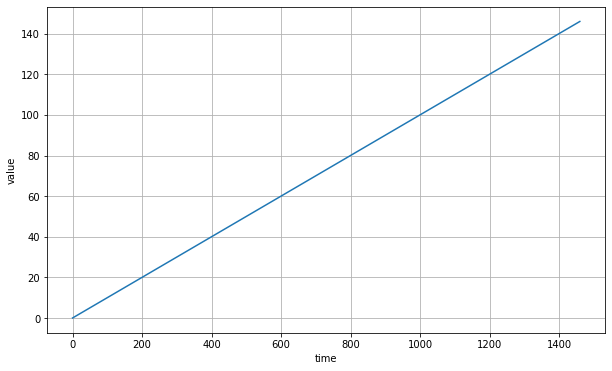

In [4]:
time = np.arange(4 * 365 + 1)
baseline = 10
series = trend(time, slope=0.1)
plot_series(time, series)
plt.show()

In [18]:
def seasonal_pattern(season_time):
    return np.where(season_time < 0.4,
                   np.cos(2 * np.pi * season_time),
                   1 / np.exp(3 * season_time))


def seasonality(time, period, amplitude=1, phase=0):
    season_time = ((time + phase) % period) / period
    return seasonal_pattern(season_time) * amplitude

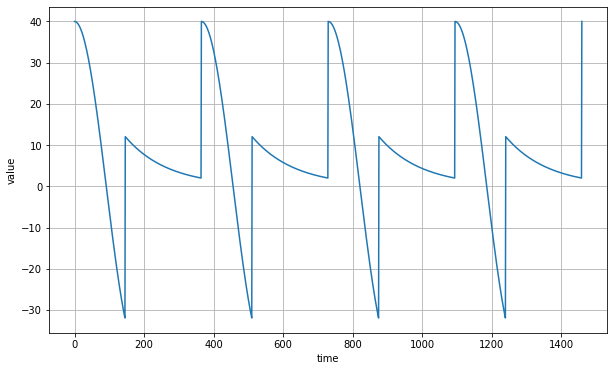

In [19]:
amplitude = 40
series = seasonality(time, period=365, amplitude=40)
plot_series(time, series)
plt.show()

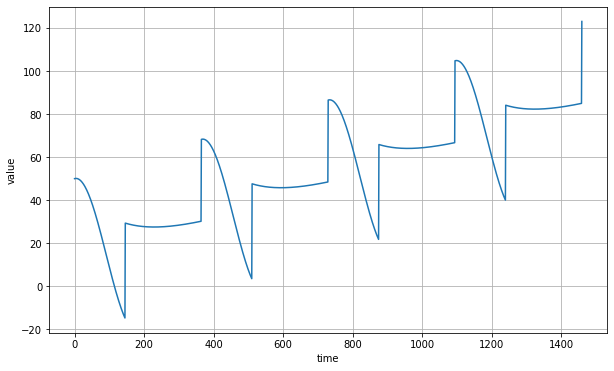

In [20]:
slope = 0.05
series = baseline + trend(time, slope=slope) + seasonality(time, period=365, amplitude=amplitude)
plot_series(time, series)
plt.show()

In [21]:
def noise(time, noise_level=1, seed=None):
    rnd = np.random.RandomState(seed)
    return rnd.randn(len(time)) * noise_level

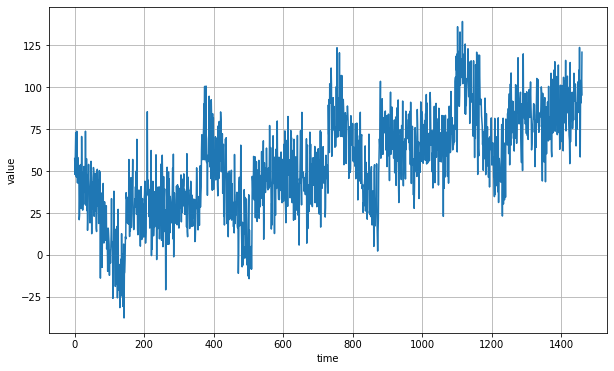

In [22]:
noise_level = 15
noisy_series = series + noise(time, noise_level=noise_level, seed=42)
plot_series(time, noisy_series)
plt.show()